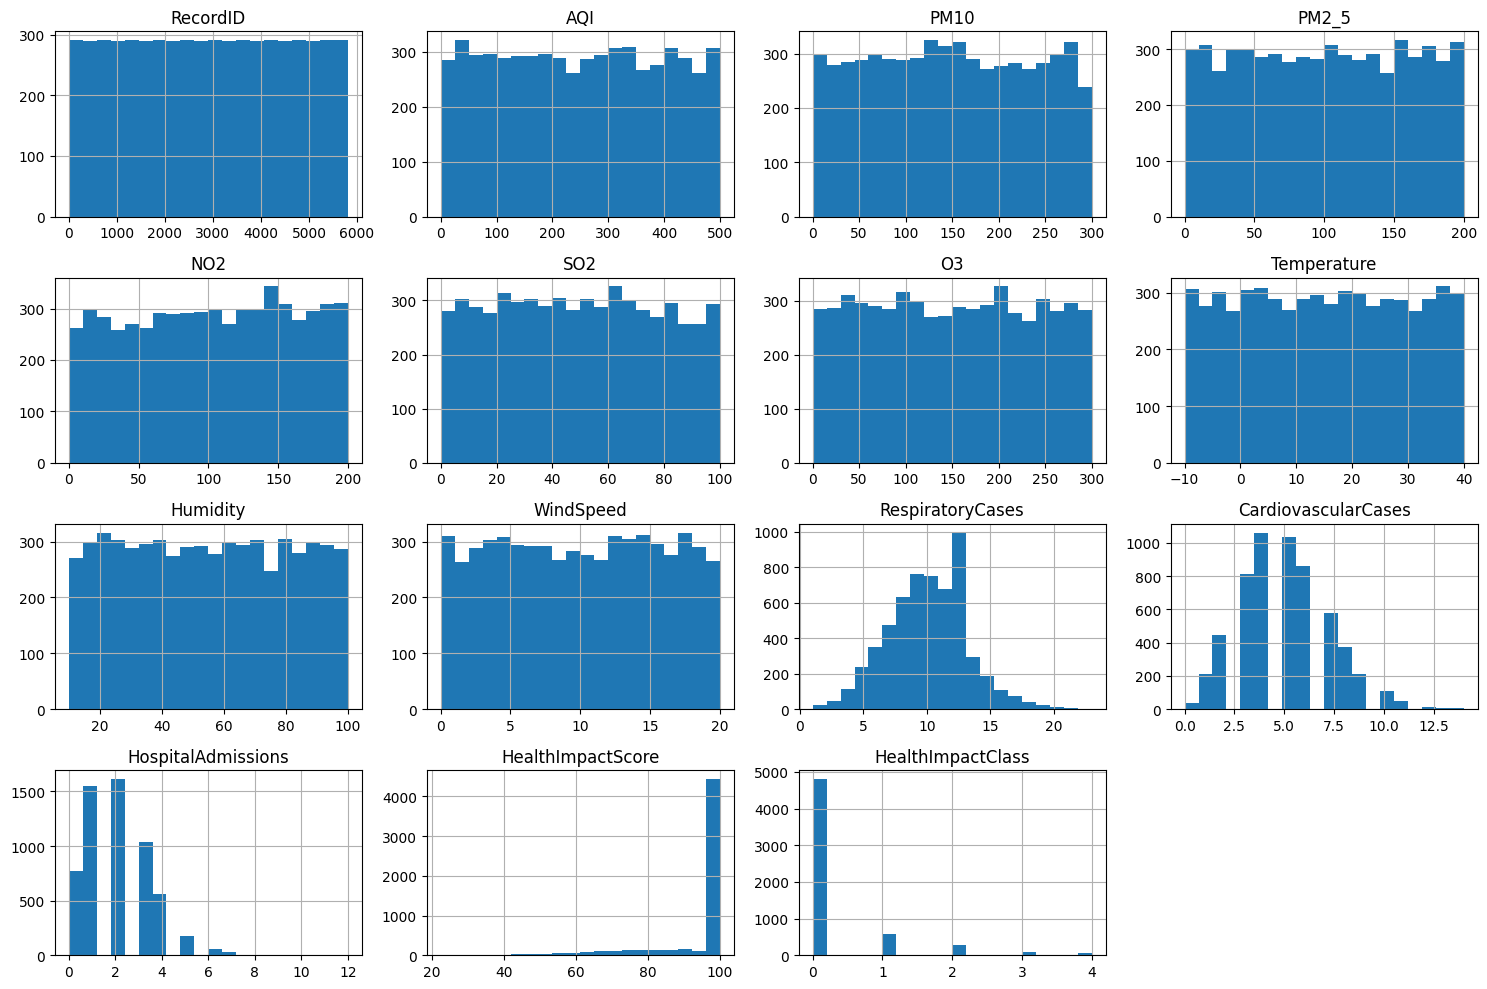

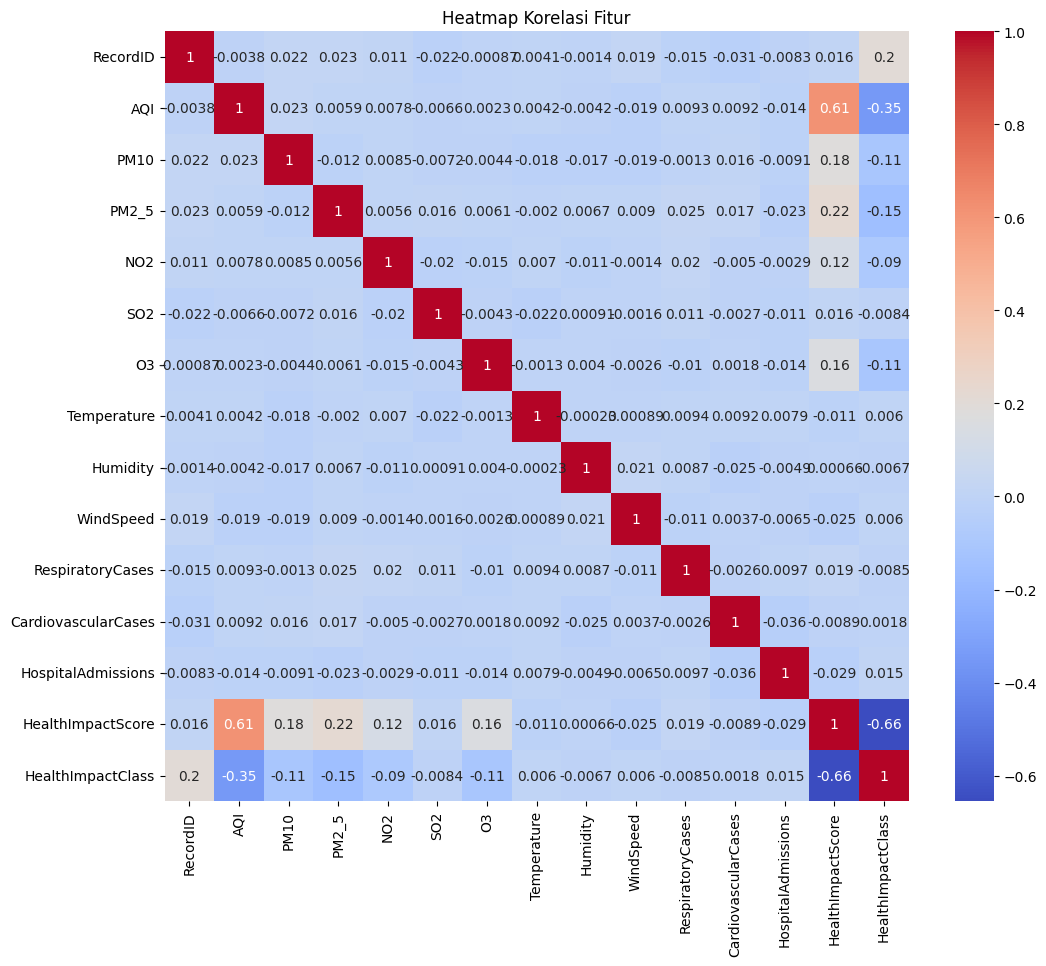

Bentuk data latih: (3486, 5)
Bentuk data dev: (1162, 5)
Bentuk data uji: (1163, 5)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = 'dataset/air_quality_health_impact_data.csv'
dataset = pd.read_csv(file_path)

# 1. EDA: Analisis Data Eksploratif
# Plot distribusi fitur numerik
dataset.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()

# 2. Data Cleaning: Menangani outlier
# Contoh metode sederhana: Memotong outlier di atas persentil ke-99
for col in ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed']:
    upper_limit = dataset[col].quantile(0.99)
    dataset[col] = dataset[col].clip(upper=upper_limit)

# 3. Menangani nilai kosong dengan mengisi nilai rata-rata tiap kolom
dataset.fillna(dataset.mean(), inplace=True)

# 4. Feature Engineering: Membuat fitur tambahan (contoh)
dataset['CombinedAirQualityIndex'] = (dataset['PM2_5'] + dataset['PM10'] + dataset['NO2']) / 3

# 5. Memilih fitur yang relevan
features = ['AQI', 'PM2_5', 'Temperature', 'O3', 'CombinedAirQualityIndex']
target = 'HealthImpactScore'  # Ganti ini dengan target lain jika diperlukan

X = dataset[features]  # Variabel fitur (input)
y = dataset[target]    # Variabel target (output)

# 6. Membagi data menjadi data latih (60%), dev set (20%), dan data uji (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 7. Normalisasi Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_dev_scaled = scaler.transform(X_dev)
X_test_scaled = scaler.transform(X_test)

# Menampilkan bentuk data untuk memastikan preprocessing selesai
print("Bentuk data latih:", X_train_scaled.shape)
print("Bentuk data dev:", X_dev_scaled.shape)
print("Bentuk data uji:", X_test_scaled.shape)
